In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

In [2]:
df_o= pd.read_csv("../Data/data_limpios.csv")
df_o.sample(2)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,...,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str
793,794,b,2022-03-01,1,beauty,1306,lipstick,2,44.79,0.16,...,standard,central,58.0,f,mobile,30,yes,edge,social,yes
47,48,b,2022-03-29,0,home,1472,lamp,0,119.90,0.16,...,NaN,central,22.0,f,tablet,20,NaN,firefox,paid,no


In [3]:
df =df_o.copy()

In [4]:
df.isnull().mean()*100

user_id              0.00
group                0.00
visit_date           0.00
conversion           0.00
product_category     0.00
product_id           0.00
product_name         0.00
quantity             0.00
price                2.00
discount             2.00
total_value          0.00
payment_method      87.65
shipping_method     87.65
region               0.00
customer_age         2.00
customer_gender      0.00
device               0.00
session_duration     0.00
coupon_used         87.65
browser              0.00
referral_source      0.00
conversion_str       0.00
dtype: float64

In [5]:
df_nulos = df.loc[:,df.isnull().sum()>0] #te permite ver las columnas que tengan nulos
df_nulos
# Si hay porcentage muy alto en columnas categoricas se genera un acategoria nueva

,price,discount,payment_method,shipping_method,customer_age,coupon_used
0,41.27,0.29,NaN,NaN,64.0,NaN
1,45.45,0.22,NaN,NaN,19.0,NaN
2,64.81,0.08,NaN,NaN,69.0,NaN
3,189.40,0.08,credit_card,express,53.0,no
4,19.82,0.19,NaN,NaN,18.0,NaN
...,...,...,...,...,...,...
1995,177.49,0.20,NaN,NaN,25.0,NaN
1996,109.75,0.20,NaN,NaN,58.0,NaN
1997,236.05,0.15,NaN,NaN,62.0,NaN
1998,22.67,0.11,NaN,NaN,46.0,NaN


In [6]:
df.shape

(2000, 22)

## Nulos categoricas

In [7]:
for col in df_nulos.select_dtypes(include="O").columns:
  print(col.upper)
  display(df_nulos[col].value_counts()/df_nulos.shape[0]*100)
  print("--------")

<built-in method upper of str object at 0x116485a70>


payment_method
bank_transfer       3.65
credit_card         3.35
paypal              2.85
cash_on_delivery    2.50
Name: count, dtype: float64

--------
<built-in method upper of str object at 0x116485ab0>


shipping_method
express     4.50
same_day    4.10
standard    3.75
Name: count, dtype: float64

--------
<built-in method upper of str object at 0x116485bb0>


coupon_used
no     6.60
yes    5.75
Name: count, dtype: float64

--------


In [8]:
# no hay ninguno que destaque por lo que se deberia de generar una nueva categoria.

In [9]:
def subplots_col_cat(dataframe):
  categorical_col = dataframe.select_dtypes(include="O").columns
  print(categorical_col)
  if len(categorical_col)==0:
    return" No hay columnas categoricas"
  # configuracion de los gráficos
  num_cols=len(categorical_col)
  rows=(num_cols+2)//3 #Saber las filas para 3 columnas.
  fig, axes =plt.subplots(rows, 3, figsize= (15, rows*5) )
  axes = axes.flatten() # convertir los ejes en 1d para facil iteración
  
  #Generar los gráficos para cada columna
  for i, col in enumerate(categorical_col):
    sns.countplot(data=dataframe, x=col, ax=axes[i],hue=col,legend=False)
    axes[i].set_title(f'Distribucion de {col}')
    
  #Eliminar elementos sobrantes de las columnas
  for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
  plt.tight_layout()
  plt.show()
    

Index(['payment_method', 'shipping_method', 'coupon_used'], dtype='object')


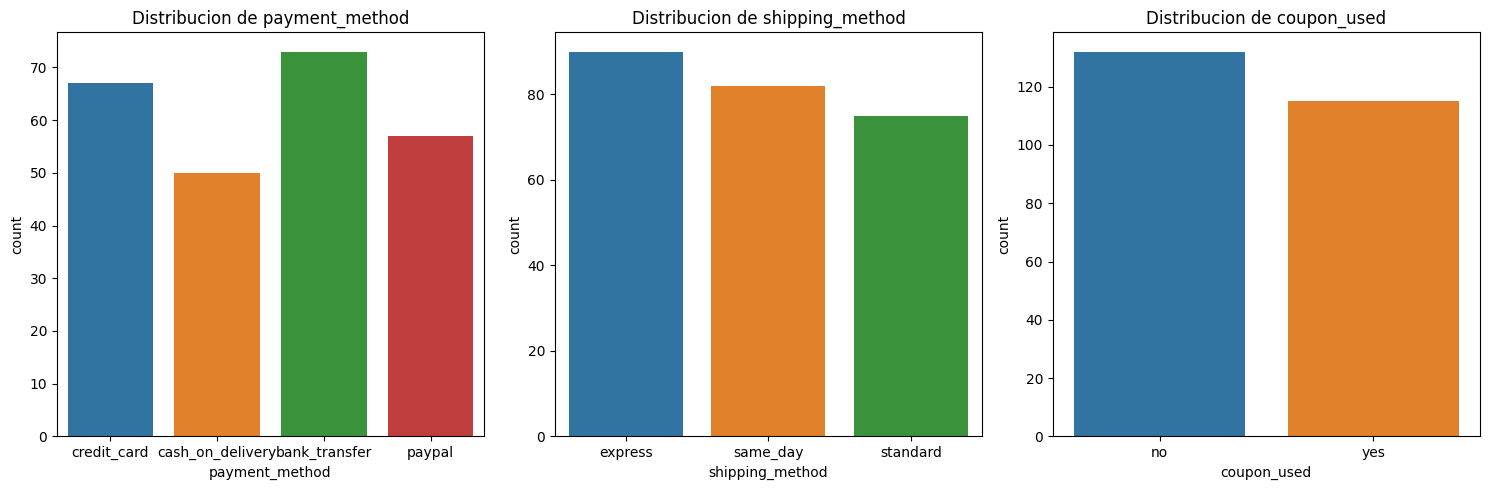

In [10]:
subplots_col_cat(df_nulos)

In [11]:
df_nulos.select_dtypes(include="O").isnull().mean()*100

payment_method     87.65
shipping_method    87.65
coupon_used        87.65
dtype: float64

In [12]:
df_nocompra=df[df['conversion']==0]
df_nocompra.isnull().mean()*100

user_id               0.000000
group                 0.000000
visit_date            0.000000
conversion            0.000000
product_category      0.000000
product_id            0.000000
product_name          0.000000
quantity              0.000000
price                 1.711352
discount              1.939532
total_value           0.000000
payment_method      100.000000
shipping_method     100.000000
region                0.000000
customer_age          2.110667
customer_gender       0.000000
device                0.000000
session_duration      0.000000
coupon_used         100.000000
browser               0.000000
referral_source       0.000000
conversion_str        0.000000
dtype: float64

se ha comprobado que los nulos de las columnas categ son debido a que no se ha realizado la compra, por lo que no se ha utuizado ningun cupon, metood de pago y ningun tipo de envio.

In [13]:
df.loc[:,df.select_dtypes(include="O").columns] = df.select_dtypes(include="O").fillna('no_conversion')

In [14]:
df.isnull().mean()*100

user_id             0.0
group               0.0
visit_date          0.0
conversion          0.0
product_category    0.0
product_id          0.0
product_name        0.0
quantity            0.0
price               2.0
discount            2.0
total_value         0.0
payment_method      0.0
shipping_method     0.0
region              0.0
customer_age        2.0
customer_gender     0.0
device              0.0
session_duration    0.0
coupon_used         0.0
browser             0.0
referral_source     0.0
conversion_str      0.0
dtype: float64

In [15]:
# para columnas numericas se usa, la media o mediana o unas estaditicos avanzados o una categoria nueva(si no presentan outliers).

## Outliers Numericos

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2000.0,1000.500000,577.494589,1.00,500.7500,1000.500,1500.250,2000.00
conversion,2000.0,0.123500,0.329093,0.00,0.0000,0.000,0.000,1.00
product_id,2000.0,1501.560000,287.188372,1000.00,1256.0000,1510.500,1746.500,1998.00
quantity,2000.0,0.371000,1.096339,0.00,0.0000,0.000,0.000,5.00
price,1960.0,184.572138,211.981538,5.02,46.0925,102.465,236.155,998.88
discount,1960.0,0.150224,0.086591,0.00,0.0800,0.150,0.220,0.30
total_value,2000.0,51.754830,234.575099,0.00,0.0000,0.000,0.000,2904.07
customer_age,1960.0,43.156633,15.361675,18.00,30.0000,42.000,56.000,70.00
session_duration,2000.0,15.633500,8.692235,1.00,8.0000,16.000,23.000,30.00


In [25]:
def subplots_col_num(dataframe):
  col_nums =dataframe.select_dtypes(include='number').columns
  num_graph =  len(col_nums)
  rows=(num_graph+2)//2 #Saber las filas para 2 columnas.
  fig, axes =plt.subplots(num_graph, 2, figsize= (15, rows*5) )
  
  #Generar los gráficos para cada columna
  for i, col in enumerate(col_nums):
    sns.histplot(data=dataframe, x=col, ax=axes[i,0],bins=200)
    axes[i,0].set_title(f'Distribucion de {col}')
    sns.boxplot(data=dataframe, x=col, ax=axes[i,1])
    
  #Eliminar elementos sobrantes de las columnas
  for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
  plt.tight_layout()
  plt.show()

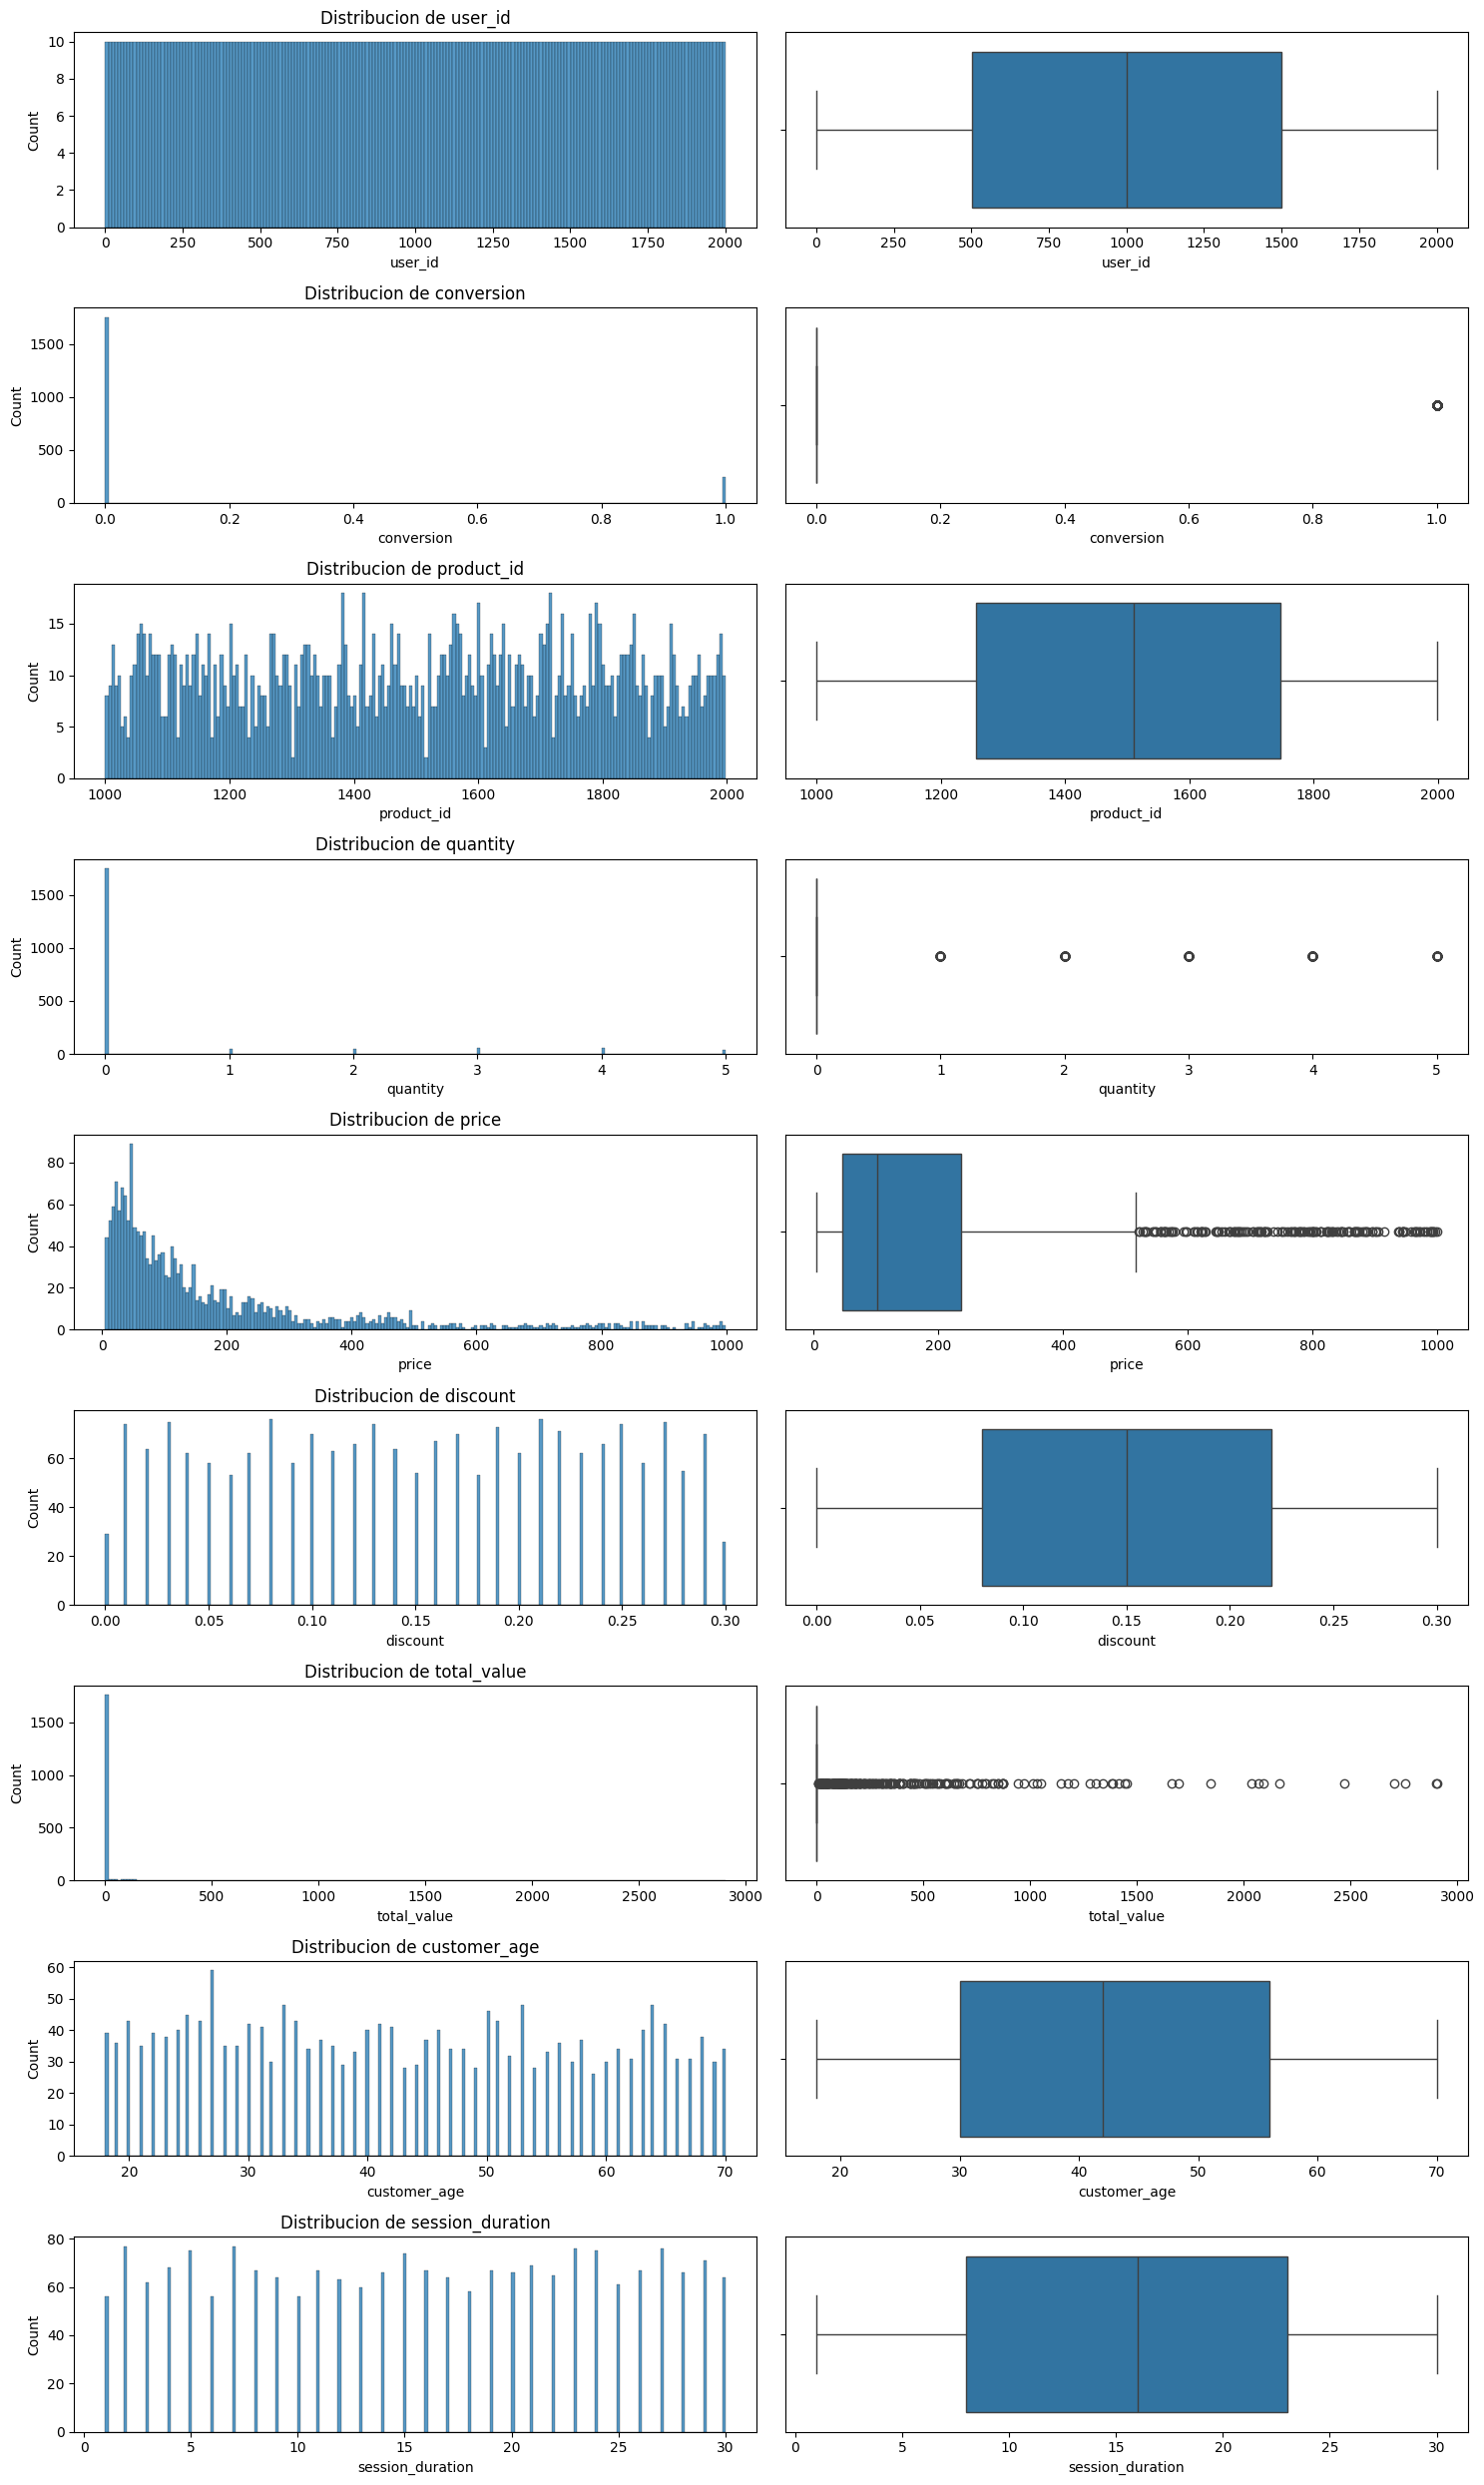

In [26]:
subplots_col_num(df)

In [33]:
#Como ver los rangos de outliers
def calculo_outliers(df,cols):
  for col in cols:
    q_75 = df[col].quantile(0.75)
    q_25 = df[col].quantile(0.25)
    rango_itq = q_75-q_25
    inferior = q_25 - (rango_itq*1.5)
    superior = q_75 + (rango_itq*1.5)
    outliers = df[(df[col]<inferior) | (df[col]> superior)]
    num_outliers = len(outliers)
    print(f'En la columna {col} tenemos un total de {num_outliers} outliers')
    

In [34]:
calculo_outliers(df,['price','total_value'])

En la columna price tenemos un total de 161 outliers
En la columna total_value tenemos un total de 247 outliers


## Nulos Numericas

In [37]:
df.select_dtypes(include='number').isnull().mean()*100

user_id             0.0
conversion          0.0
product_id          0.0
quantity            0.0
price               2.0
discount            2.0
total_value         0.0
customer_age        2.0
session_duration    0.0
dtype: float64

In [38]:
df_filled_simple = df.fillna({
  'discount': df['discount'].mean(),
  'customer_age': df['customer_age'].median()
})

In [39]:
df_filled_simple.isnull().sum()

user_id              0
group                0
visit_date           0
conversion           0
product_category     0
product_id           0
product_name         0
quantity             0
price               40
discount             0
total_value          0
payment_method       0
shipping_method      0
region               0
customer_age         0
customer_gender      0
device               0
session_duration     0
coupon_used          0
browser              0
referral_source      0
conversion_str       0
dtype: int64

In [47]:
def imputar_iterative ( dataframe, lista_columnas):
  iter_imputer = IterativeImputer(max_iter=50,
                                  random_state=42)
  data_imputed = iter_imputer.fit_transform(dataframe[lista_columnas])
  new_col = [col + "_iterative" for col in lista_columnas]
  dataframe[new_col] = data_imputed
  return dataframe

In [50]:
df_filled_simple = imputar_iterative(df_filled_simple, ['price'])
df_filled_simple.isnull().sum()

user_id              0
group                0
visit_date           0
conversion           0
product_category     0
product_id           0
product_name         0
quantity             0
price               40
discount             0
total_value          0
payment_method       0
shipping_method      0
region               0
customer_age         0
customer_gender      0
device               0
session_duration     0
coupon_used          0
browser              0
referral_source      0
conversion_str       0
price_iterative      0
dtype: int64

In [55]:
def imputar_knn ( dataframe, lista_columnas):
  knn_imputer = KNNImputer(n_neighbors=5)
  data_imputed = knn_imputer.fit_transform(dataframe[lista_columnas])
  new_col = [col + "_knn" for col in lista_columnas]
  dataframe[new_col] = data_imputed
  return dataframe

In [56]:
df_filled_simple = imputar_knn(df_filled_simple, ['price'])
df_filled_simple.isnull().sum()

user_id              0
group                0
visit_date           0
conversion           0
product_category     0
product_id           0
product_name         0
quantity             0
price               40
discount             0
total_value          0
payment_method       0
shipping_method      0
region               0
customer_age         0
customer_gender      0
device               0
session_duration     0
coupon_used          0
browser              0
referral_source      0
conversion_str       0
price_iterative      0
price_knn            0
dtype: int64

In [58]:
df_filled_simple[['price','price_iterative','price_knn']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,1960.0,184.572138,211.981538,5.02,46.0925,102.465,236.1550,998.88
price_iterative,2000.0,184.572138,209.849945,5.02,46.7975,106.810,231.7425,998.88
price_knn,2000.0,184.572138,209.849945,5.02,46.7975,106.810,231.7425,998.88


In [59]:
df_filled_simple.drop(columns=['price','price_iterative'], inplace=True)

In [60]:
df_filled_simple.isnull().sum()

user_id             0
group               0
visit_date          0
conversion          0
product_category    0
product_id          0
product_name        0
quantity            0
discount            0
total_value         0
payment_method      0
shipping_method     0
region              0
customer_age        0
customer_gender     0
device              0
session_duration    0
coupon_used         0
browser             0
referral_source     0
conversion_str      0
price_knn           0
dtype: int64

In [61]:
df_filled_simple.to_csv("../Data/datos_limpios_nonulos.csv", index=False)